In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import sys
import os 

In [3]:
module_path = os.path.abspath(os.path.join('C:/Users/Vrund/Desktop/IIIT-H MS Research/Semester 1/Data Analytics 1/Project'))
#if module_path not in sys.path:
sys.path.append(module_path)

In [4]:
from scipy.cluster.hierarchy import linkage , dendrogram

In [5]:
import sklearn.cluster as sc

In [6]:
df1 = pd.read_csv("Data_Case1_normalized.csv")

In [7]:
df1.head()

,Unnamed: 0,Overall,Potential,Weak Foot,Skill Moves,Performance,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,ID,Name
0,0,100.000,97.872,75.0,75.0,100.000,89.773,100.000,73.333,96.512,...,21.348,98.925,100.000,80.460,100.000,32.967,28.571,26.136,158023,L. Messi
1,1,100.000,97.872,75.0,100.0,96.774,89.773,98.925,94.444,86.047,...,29.213,100.000,85.714,91.954,98.925,27.473,31.868,22.727,20801,Cristiano Ronaldo
2,2,95.833,95.745,100.0,100.0,93.548,84.091,91.398,64.444,89.535,...,37.079,93.548,91.667,87.356,97.849,26.374,24.176,34.091,190871,Neymar Jr
3,3,93.750,95.745,50.0,0.0,93.226,13.636,11.828,18.889,50.000,...,30.337,10.753,69.048,40.230,69.892,13.187,20.879,11.364,193080,De Gea
4,4,93.750,93.617,100.0,75.0,90.323,100.000,86.022,56.667,98.837,...,65.169,91.398,100.000,85.057,91.398,71.429,61.538,54.545,192985,K. De Bruyne


In [8]:
df_ = df1.iloc[:,1:-2].values

In [9]:
def AGNES(data,k):
    clusters = sc.AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='complete')
    clusters.fit_predict(data)
    labels = clusters.labels_
        
    return labels

### Task :  Vary linkages and compare them

In [10]:
link_type = ['single','complete','average','centroid']

In [63]:
def plot_dendrogram(data,x):
    Z = linkage(data,method=x,metric='euclidean')
    plt.figsize=(20,18)
    dendrogram(Z,p=50,truncate_mode='lastp',orientation='top',distance_sort='descending',show_leaf_counts=True)
    plt.title("Linkage type : "+x)
    plt.show()

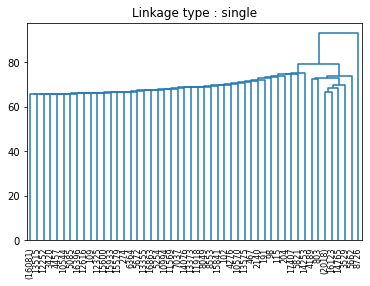

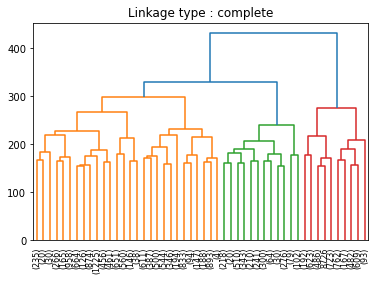

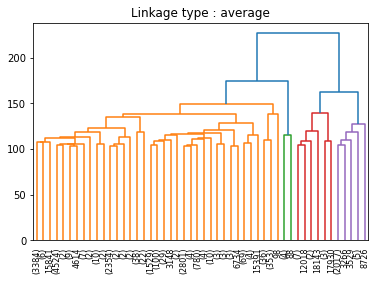

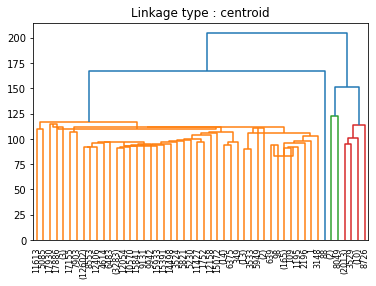

In [64]:
for x in link_type:
    plot_dendrogram(df_,x)

## Detect Outliers

**For Linkage type = 'complete' and Affinity = 'euclidean'**

In [180]:
n_clust=4

In [181]:
lb = AGNES(df_,n_clust)

In [182]:
lb.shape

(18147,)

In [183]:
grouping = []

In [238]:
for i in range(n_clust):
    grouping.append(np.where(lb==i))
    print("Size of cluster "+str(i+1)+" is "+str(grouping[i][0].shape[0]))

Size of cluster 1 is 4138
Size of cluster 2 is 6875
Size of cluster 3 is 2393
Size of cluster 4 is 4741


In [240]:
def find_outliers(num_arr,cluster_id):
    dist = np.sum((num_arr - num_arr.mean(axis = 0))**2, axis = 1)
    q1, q2, q3 = np.percentile(dist,[25,50,75])
    iqr = q3-q1
    mn, mx = q1 - 1.5*iqr, q3 + 1.5*iqr
    # indices in out_idx are based on the cluster array
    out_idx = np.where((dist > mx) | (dist < mn))
    
    grp_pos=[]
    if np.size(out_idx) !=0:
        for i in range(np.size(out_idx)):
            grp_pos.append(grouping[cluster_id][0][out_idx[0][i]])
      
    df_new = df1.iloc[grp_pos,36]
    #print(cluster_id)
    print("Outliers for Cluster "+str(cluster_id+1)+" are :")
    print(df_new)
    
    return dist
    

In [241]:
cluster_info = []

In [242]:
for x in range(n_clust):
    num_arr = df_[grouping[x]][:]
    cluster_info.append(find_outliers(num_arr,x))  

Outliers for Cluster 1 are :
3288           J. Schunke
3529           L. Ardente
3676              J. Boye
3924          F. Pisacane
4150         A. Henríquez
4379           L. Szukała
4657               Arroyo
7799             D. Iorfa
8453            C. Traoré
8919        Jailson Acuna
9928        Teixeira José
11558           K. Eisele
13571           E. Hewitt
15829          E. Osadebe
15904           M. Sprang
15973         K. Kirihata
16888    L. Ashby-Hammond
17522       M. Zapytowski
17849        J. Osobiński
17990       E. Destanoglu
18134            J. Milli
Name: Name, dtype: object
Outliers for Cluster 2 are :
8           Sergio Ramos
12              D. Godín
14              N. Kanté
20       Sergio Busquets
24          G. Chiellini
              ...       
14284            S. Boyd
14384          B. Nugent
14474       C. Robertson
15917         D. Webster
16337           C. Kenna
Name: Name, Length: 276, dtype: object
Outliers for Cluster 3 are :
0                 L. Messi


Text(0, 0.5, 'Squared distance of each point from its cluster centroid')

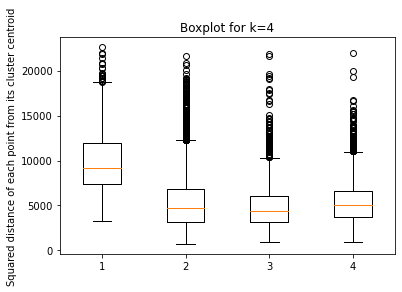

In [239]:
ppf_list = [cluster_info[0],cluster_info[1],cluster_info[2],cluster_info[3]]
plt.boxplot(ppf_list)
plt.xticks([1,2,3,4],np.arange(n_clust)+1)
plt.title("Boxplot for k=4")
plt.ylabel("Squared distance of each point from its cluster centroid")